# Investigação de Métodos de Aprendizado de Máquina para Predição de Qualidade de Vinhos

## 0. Load data

In [1]:
import pandas as pd

In [2]:
df_red = pd.read_csv('/content/drive/MyDrive/TCC/winequality-red.csv', sep=";")
df_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df_white = pd.read_csv('/content/drive/MyDrive/TCC/winequality-white.csv', sep=";")
df_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


## 1. Exploratory Data Analysis - EDA

Let's perform the EDA using the white wine dataframe, since it contains more records. We will start with a describe method to have an overview of the data, then moving to more specific analyses.

In [4]:
df_white.columns = df_white.columns.str.replace(' ', '_')

In [5]:
df_white.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


There are two things to note here at first glance:

*   All of the columns are numeric. That means we won't need to encode it, only normalize the values for model calculations.
*   The columns *free_sulfur_dioxide*, *total_sulfur_dioxide* and *residual_sugar* have high standard deviation values. We should investigate that.

Before jumping into the column analysis, let's just search for null values and work with them first.



In [6]:
# Null values
df_white.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

We didn't find any null values, which indicates the data has a good consistency. Now let's look into those columns with high standard deviations.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

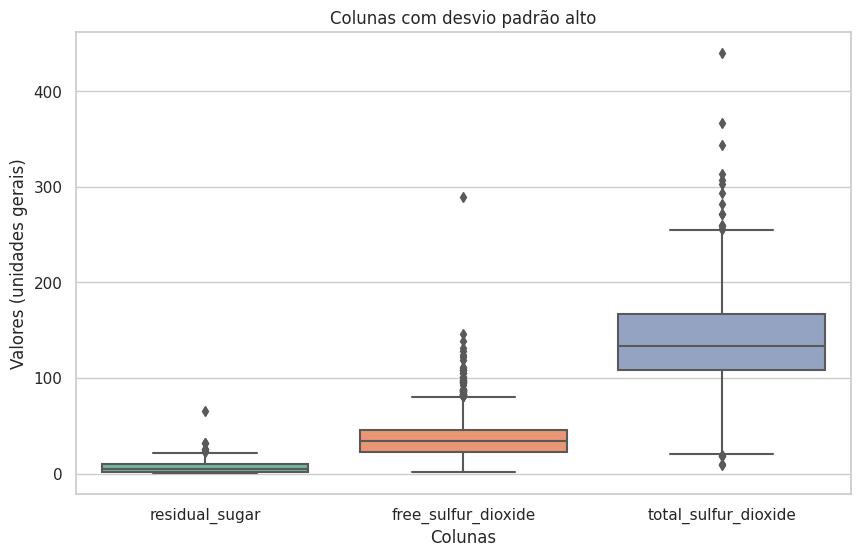

In [8]:
plt.figure(figsize=(10, 6))  # Fig size
sns.set(style="whitegrid")  # Plot style

sns.boxplot(data=df_white[['residual_sugar', 'free_sulfur_dioxide', 'total_sulfur_dioxide']], palette="Set2")

plt.title("Colunas com desvio padrão alto")
plt.xlabel("Colunas")
plt.ylabel("Valores (unidades gerais)")

plt.show()


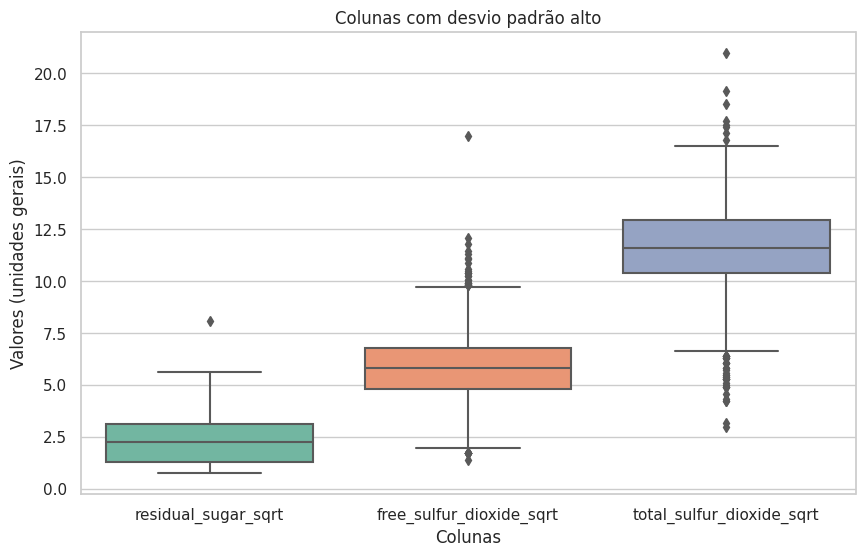

In [9]:
plt.figure(figsize=(10, 6))  # Fig size
sns.set(style="whitegrid")  # Plot style

df_white_sqrt_copy = df_white.copy()
df_white_sqrt_copy['residual_sugar_sqrt'] = np.sqrt(df_white_sqrt_copy['residual_sugar'])
df_white_sqrt_copy['free_sulfur_dioxide_sqrt'] = np.sqrt(df_white_sqrt_copy['free_sulfur_dioxide'])
df_white_sqrt_copy['total_sulfur_dioxide_sqrt'] = np.sqrt(df_white_sqrt_copy['total_sulfur_dioxide'])
sns.boxplot(data=df_white_sqrt_copy[['residual_sugar_sqrt', 'free_sulfur_dioxide_sqrt', 'total_sulfur_dioxide_sqrt']], palette="Set2")

plt.title("Colunas com desvio padrão alto")
plt.xlabel("Colunas")
plt.ylabel("Valores (unidades gerais)")

plt.show()


As we can see, these columns have some outliers. There is a possibility that these outlier values indicate some specific variant of wine.

There are several strategies for dealing with outliers. Let's see how many rows contain outlier values for these columns. If the total number isn't high to the point of damaging our model development, we will keep the rows to help with generalization. Otherwise, we might fill those values with other values, such as mean or median.

In [10]:
# Select the columns of interest
columns_of_interest = ['residual_sugar', 'free_sulfur_dioxide', 'total_sulfur_dioxide']

# Function to count outliers
def count_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    return ((column < (Q1 - 1.5 * IQR)) | (column > (Q3 + 1.5 * IQR))).sum()

# Create a dictionary to store the number of outliers per column
outliers_per_column = {}

# Iterate over the columns of interest
for column in columns_of_interest:
    outliers_per_column[column] = count_outliers(df_white[column])

print(outliers_per_column)

{'residual_sugar': 7, 'free_sulfur_dioxide': 50, 'total_sulfur_dioxide': 19}


The outliers in those columns make about 1% of the total volume of data, which means there is no need to remove those rows.

The quality variable is our target. Despite being a numerical value, we will treat it as multiclass. In theory, the values could range from 1 to 10, but we must keep in mind these grades are given by humans. Typically, humans tend to keep values in a "standard" range. This is probably why most of the records have a grade of 5 or 6, with a slight tendency to go up.

In [11]:
df_white['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

## 2. Data preparation

We made a brief exploration of the data regarding null values and outliers. There is much more that could be done in the past phase, but that's for another time. Now, let's prepare the data and get it ready to be used in the ML models. We will perform a data normalization, which will rescale the numeric values of different units to a similar range. We will use Standard Scaler.

In [12]:
df_white.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score

In [35]:
X = df_white.loc[:, df_white.columns != "quality"]
y = df_white.quality

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

Even though we have no missing values in the data currently being used, it's a good practice to implement a generalistic preprocessing method. In this case, the pipeline is a study and won't receive new data after this, but in the real world we must be prepared.

In [25]:
preprocess_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

First of all, we will run three selected baseline models. Then, we will evaluate them and perform feature selection and tune each model's hyperparameters.

In [26]:
models = [
    SVC()
    ,MLPClassifier()
    ,GradientBoostingClassifier()
]

In [49]:
for model in models:
  pipe = Pipeline([('preprocess_pipe', preprocess_pipe), (f'{type(model).__name__}', model)])
  pipe.fit(X_train, y_train)
  y_pred = pipe.predict(X_test)
  f1 = f1_score(y_test, y_pred, average='macro')
  print(f'Model: {type(model).__name__}\n', f'Pipe score: {pipe.score(X_test, y_test)}\n', f'F1_Score: {f1}\n')
  print('=======================================')

Model: SVC
 Pipe score: 0.5571428571428572
 F1_Score: 0.22785260156050754



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Model: MLPClassifier
 Pipe score: 0.5489795918367347
 F1_Score: 0.2683494093646758

Model: GradientBoostingClassifier
 Pipe score: 0.5945578231292517
 F1_Score: 0.3474540425169737



All of the baseline models perform above 50% when looking at the pipeline score, which is already better than random. For now, GradientBoostingClassifier takes the lead, but they are all still far from good. Let's perform a feature selection process.

In [28]:
from sklearn.feature_selection import SelectKBest, chi2

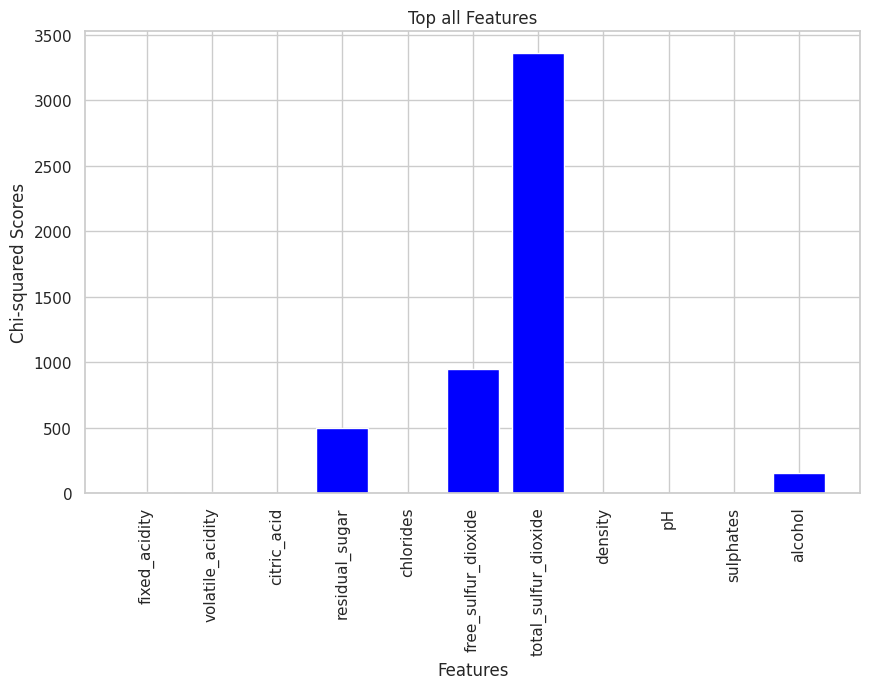

In [36]:
# Define the number of features you want to select (k)
k = 'all'

# Initialize SelectKBest with chi2
selector = SelectKBest(chi2, k=k)
X_new = selector.fit_transform(X, y)

# Get the selected features
selected_features = selector.get_support()

# Get original column names
original_column_names = X.columns[selected_features]

# Get the scores of the selected features
feature_scores = selector.scores_[selected_features]

# Plot the feature scores
plt.figure(figsize=(10, 6))
plt.bar(original_column_names, feature_scores, color='blue')
plt.xlabel('Features')
plt.ylabel('Chi-squared Scores')
plt.title(f'Top {k} Features')
plt.xticks(rotation='vertical')
plt.show()

We can see that *total_sulfur_dioxide*, *free_sulfur_dioxide*, *residual_sugar* and *alcohol* are the features with the highest correlation to the final quality. Let's drop these four features for now in order to have a closer look at the other ones.

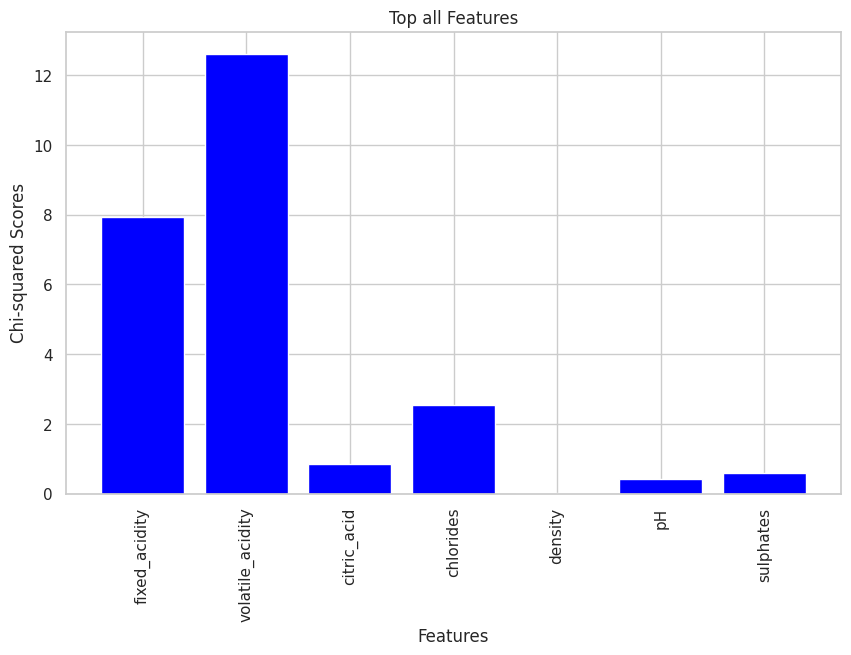

In [38]:
# Define the number of features you want to select (k)
k = 'all'

# Initialize SelectKBest with chi2
selector = SelectKBest(chi2, k=k)
X_copy = X.copy()
X_copy = X_copy.drop(columns=['total_sulfur_dioxide', 'free_sulfur_dioxide', 'residual_sugar', 'alcohol'])
X_new = selector.fit_transform(X_copy, y)

# Get the selected features
selected_features = selector.get_support()

# Get original column names
original_column_names = X_copy.columns[selected_features]

# Get the scores of the selected features
feature_scores = selector.scores_[selected_features]

# Plot the feature scores
plt.figure(figsize=(10, 6))
plt.bar(original_column_names, feature_scores, color='blue')
plt.xlabel('Features')
plt.ylabel('Chi-squared Scores')
plt.title(f'Top {k} Features')
plt.xticks(rotation='vertical')
plt.show()

Cool, we will remove the "density" variable as it doesn't correlate with the target variable at all. We will keep all others, even the ones with small Chi-squared scores, because we don't have a lot of features.

Now we will perform a quick, simple hyperparameter tuning using GridSearchCV to find out optimal hyperparameters for our three models.

In [55]:
from sklearn.model_selection import GridSearchCV

# Define a list of models
models = [SVC(), MLPClassifier(), GradientBoostingClassifier()]

# Define parameter grids for SVC, MLPClassifier, and GradientBoostingClassifier
param_grid_svc = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}

param_grid_mlp = {
    'hidden_layer_sizes': [(100,), (50, 50), (50, 100, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
}

param_grids = [param_grid_svc, param_grid_mlp, param_grid_gb]

for model, param_grid in zip(models, param_grids):
    grid = GridSearchCV(model, param_grid, refit=True, verbose=3)
    grid.fit(X_train, y_train)

    # Print best parameter after tuning
    print(f'Best params for {type(model).__name__}: {grid.best_params_}')

    # Print how the model looks after hyper-parameter tuning
    print(f'Hyparparameters for {type(model).__name__}: {grid.best_estimator_}')

Fitting 5 folds for each of 25 candidates, totalling 125 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.453 total time=   1.9s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.452 total time=   1.3s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.452 total time=   1.2s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.453 total time=   1.3s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.453 total time=   1.4s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.453 total time=   1.9s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.452 total time=   1.8s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.452 total time=   1.3s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.453 total time=   1.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.453 total time=   1.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.456 total time=   0.6s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.452 total time=   0.6s
[CV 3/5] END .....C=0.1, gam

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant;, score=0.480 total time=   0.8s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant;, score=0.493 total time=   1.0s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant;, score=0.504 total time=   0.9s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant;, score=0.472 total time=   1.4s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant;, score=0.493 total time=   0.7s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=invscaling;, score=0.415 total time=   1.5s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=invscaling;, score=0.510 total time=   1.0s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=invscaling;, score=0.4

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=invscaling;, score=0.538 total time=   9.3s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=invscaling;, score=0.504 total time=   3.0s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=invscaling;, score=0.456 total time=   1.5s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=invscaling;, score=0.521 total time=   4.5s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=invscaling;, score=0.492 total time=   6.9s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive;, score=0.510 total time=   2.0s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive;, score=0.480 total time=   2.2s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_l

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate=constant;, score=0.531 total time=   7.1s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate=constant;, score=0.480 total time=   5.8s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate=invscaling;, score=0.439 total time=   4.1s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate=invscaling;, score=0.536 total time=   2.6s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate=invscaling;, score=0.499 total time=   6.9s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate=invscaling;, score=0.445 total time=   2.5s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate=invscaling;, score=0.495 total time=   2.9s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_siz

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant;, score=0.552 total time=   6.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant;, score=0.576 total time=   5.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant;, score=0.554 total time=   5.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant;, score=0.489 total time=   6.5s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant;, score=0.508 total time=   5.3s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=invscaling;, score=0.534 total time=   6.0s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=invscaling;, score=0.531 total time=   5.0s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=invscaling;, score=0.535 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=invscaling;, score=0.521 total time=   6.4s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=invscaling;, score=0.507 total time=   6.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive;, score=0.544 total time=   6.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive;, score=0.541 total time=   5.8s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive;, score=0.550 total time=   5.0s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive;, score=0.508 total time=   5.8s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive;, score=0.521 total time=   4.9s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant;, score=0.522 total time=   7.0s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant;, score=0.545 total time=   8.9s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant;, score=0.500 total time=   9.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant;, score=0.508 total time=   7.9s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant;, score=0.514 total time=   7.9s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=invscaling;, score=0.535 total time=   7.8s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=invscaling;, score=0.548 total time=   9.3s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=invscaling;, score=0.538 total time=   6.4s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=invscaling;, score=0.477 total time=   9.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=invscaling;, score=0.515 total time=  10.5s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive;, score=0.523 total time=   5.3s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive;, score=0.526 total time=   7.0s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive;, score=0.516 total time=   9.6s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive;, score=0.472 total time=   5.7s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive;, score=0.524 total time=   8.3s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=constant;, score=0.531 total time=   8.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=constant;, score=0.551 total time=  17.0s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=constant;, score=0.510 total time=  12.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=constant;, score=0.520 total time=  16.9s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=constant;, score=0.507 total time=   7.8s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=invscaling;, score=0.531 total time=  12.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=invscaling;, score=0.564 total time=  17.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=invscaling;, score=0.523 total time=  18.4s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=invscaling;, score=0.526 total time=  16.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=invscaling;, score=0.511 total time=  17.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive;, score=0.491 total time=  17.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive;, score=0.551 total time=  14.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive;, score=0.542 total time=  17.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive;, score=0.530 total time=  16.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive;, score=0.524 total time=  16.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant;, score=0.548 total time=   6.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant;, score=0.516 total time=   5.5s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant;, score=0.525 total time=   5.0s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant;, score=0.514 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant;, score=0.536 total time=   6.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=invscaling;, score=0.545 total time=   6.4s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=invscaling;, score=0.545 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=invscaling;, score=0.539 total time=   5.5s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=invscaling;, score=0.517 total time=   6.0s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=invscaling;, score=0.531 total time=   5.3s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive;, score=0.544 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive;, score=0.548 total time=   5.9s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive;, score=0.517 total time=   4.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive;, score=0.530 total time=   6.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive;, score=0.504 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=constant;, score=0.516 total time=  10.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=constant;, score=0.557 total time=   7.8s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=constant;, score=0.519 total time=   9.4s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=constant;, score=0.495 total time=   9.3s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=constant;, score=0.531 total time=   6.3s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=invscaling;, score=0.523 total time=   9.6s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=invscaling;, score=0.547 total time=   5.6s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=invscaling;, score=0.519 total time=  10.4s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=invscaling;,

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate=constant;, score=0.563 total time=  18.2s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate=constant;, score=0.485 total time=   5.5s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate=constant;, score=0.507 total time=  10.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate=invscaling;, score=0.513 total time=  17.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate=invscaling;, score=0.560 total time=  16.3s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate=invscaling;, score=0.500 total time=  13.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate=invscaling;, score=0.493 total time=   9.3s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate=invscaling;, score=0.527 total time=  16.8s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive;, score=0.520 total time=  12.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive;, score=0.561 total time=  19.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive;, score=0.531 total time=  17.4s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive;, score=0.526 total time=   8.6s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive;, score=0.512 total time=  13.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant;, score=0.517 total time=   6.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant;, score=0.557 total time=   5.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant;, score=0.539 total time=   6.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant;, score=0.507 total time=   5.9s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant;, score=0.521 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=invscaling;, score=0.532 total time=   6.4s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=invscaling;, score=0.536 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=invscaling;, score=0.532 total time=   5.9s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=invscaling;, score=0.486 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=invscaling;, score=0.520 total time=   5.6s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive;, score=0.510 total time=   5.7s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive;, score=0.573 total time=   4.6s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive;, score=0.503 total time=   3.1s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive;, score=0.517 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive;, score=0.505 total time=   6.4s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=constant;, score=0.488 total time=   5.0s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=constant;, score=0.557 total time=   9.8s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=constant;, score=0.493 total time=   5.6s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=constant;, score=0.523 total time=   7.2s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=constant;, score=0.504 total time=   6.9s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=invscaling;, score=0.512 total time=   8.6s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=invscaling;, score=0.573 t

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=adaptive;, score=0.535 total time=   8.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=adaptive;, score=0.512 total time=  10.2s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=adaptive;, score=0.501 total time=   5.3s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 100, 50), learning_rate=constant;, score=0.513 total time=  15.5s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 100, 50), learning_rate=constant;, score=0.557 total time=  14.8s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 100, 50), learning_rate=constant;, score=0.529 total time=  12.7s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 100, 50), learning_rate=constant;, score=0.514 total time=  14.6s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 100, 50), learning_rate=constant;, score=0.523 total time=  11.4s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 100, 50), learning_r

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


[CV 1/5] END ......max_depth=3, n_estimators=50;, score=0.592 total time=   3.0s
[CV 2/5] END ......max_depth=3, n_estimators=50;, score=0.606 total time=   3.0s
[CV 3/5] END ......max_depth=3, n_estimators=50;, score=0.599 total time=   2.3s
[CV 4/5] END ......max_depth=3, n_estimators=50;, score=0.556 total time=   2.4s
[CV 5/5] END ......max_depth=3, n_estimators=50;, score=0.559 total time=   2.4s
[CV 1/5] END .....max_depth=3, n_estimators=100;, score=0.587 total time=   5.9s
[CV 2/5] END .....max_depth=3, n_estimators=100;, score=0.612 total time=   6.3s
[CV 3/5] END .....max_depth=3, n_estimators=100;, score=0.622 total time=   4.8s
[CV 4/5] END .....max_depth=3, n_estimators=100;, score=0.572 total time=   5.9s
[CV 5/5] END .....max_depth=3, n_estimators=100;, score=0.577 total time=   4.6s
[CV 1/5] END .....max_depth=3, n_estimators=200;, score=0.599 total time=  10.2s
[CV 2/5] END .....max_depth=3, n_estimators=200;, score=0.630 total time=   9.4s
[CV 3/5] END .....max_depth=

Ok, our Grid Search returned us the best parameters for our three models. Let's test them out and compare to the baseline models. For that, we will run the baseline models once more, just so that we have the results closer to each other for comparison.

In [57]:
for model in models:
  pipe = Pipeline([('preprocess_pipe', preprocess_pipe), (f'{type(model).__name__}', model)])
  pipe.fit(X_train, y_train)
  y_pred = pipe.predict(X_test)
  f1 = f1_score(y_test, y_pred, average='macro')
  print(f'Model: {type(model).__name__}\n', f'Pipe score: {pipe.score(X_test, y_test)}\n', f'F1_Score: {f1}\n')
  print('=======================================')

Model: SVC
 Pipe score: 0.5571428571428572
 F1_Score: 0.22785260156050754



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Model: MLPClassifier
 Pipe score: 0.5537414965986395
 F1_Score: 0.27207045479764225

Model: GradientBoostingClassifier
 Pipe score: 0.5938775510204082
 F1_Score: 0.3461465277487159



Now, let's remove the column "density", with less importance according to the feature selection process, and then apply the tunned hyperparameters.

In [60]:
X = df_white.drop(columns=['quality', 'density'])
y = df_white.quality

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [61]:
models_tuned = [
    SVC(C=10, gamma=1)
    ,MLPClassifier(activation='tanh')
    ,GradientBoostingClassifier(max_depth=5, n_estimators=200)
]

for model_tuned in models_tuned:
  pipe = Pipeline([('preprocess_pipe', preprocess_pipe), (f'{type(model_tuned).__name__}', model_tuned)])
  pipe.fit(X_train, y_train)
  y_pred = pipe.predict(X_test)
  f1 = f1_score(y_test, y_pred, average='macro')
  print(f'Model: {type(model_tuned).__name__}\n', f'Pipe score: {pipe.score(X_test, y_test)}\n', f'F1_Score: {f1}\n')
  print('=======================================')

Model: SVC
 Pipe score: 0.6496598639455783
 F1_Score: 0.38494910994433607



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Model: MLPClassifier
 Pipe score: 0.5693877551020409
 F1_Score: 0.26198554825683473

Model: GradientBoostingClassifier
 Pipe score: 0.6571428571428571
 F1_Score: 0.4354700880768047



The best model is GradientBoostingClassifier after performing some hyperparameter tuning and feature selection. Now, the model can be saved and deployed. Of course, it is possible to perform much more experiments with this data and other ML models, but for now that concludes our study.